# Simple Handwriting Recognition using Scikit-Learn

Threw this together really quickly. Treat this as a small demo/tutorial as to how we can use a Random Forest Classifier to predict handwritten digits.

By David (@chromadrive)

### Import libraries and datasets

We're going to be using scikit-learn because it already includes a bunch of classifiers and datasets - and one of them conveniently already happens to be one of handwriting samples.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn import ensemble
import numpy as np
%matplotlib inline

#Import dataset
from sklearn.datasets import load_digits

digits = load_digits()

### Visualize our data points

Our data comes in the form of an 8x8 NumPy array. Each element represents the greyscale value of the corresponding image, with each value ranging from 0-255 (because we're working in 8-bit)

Here's what one of our data points looks like when we graph it out:

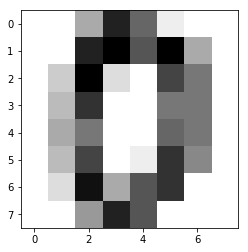

In [2]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

And we can even visualize the first few data points too. Here are the first 20 data points, with their labels.

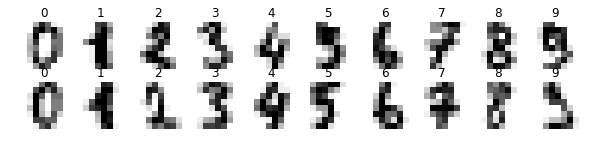

In [3]:
plt.figure(figsize=(10,2))
for i, (image, label) in enumerate(list(zip(digits.images, digits.target))[:20]):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.title('%i' % label)
    plt.imshow(image, cmap=plt.cm.gray_r)

###  Set up our samples

We need to have two samples: a training sample to train our classifier on, and a validation sample to test if it works. We'll define our input (x-variable) as the greyscale array input, and our output (y-variable) as the number being represented.

To seperate the two samples, we'll just select a bunch of random elements from the dataset and place them in our training set, then we'll place everything that's not in the training set in our validation set.

In [4]:
num_samples = len(digits.images)
x = digits.images.reshape((num_samples, -1)) # 255-[val] to every elem, so we don't have to deal with it later
y = digits.target

# Generate random indices
training_indices = np.random.choice(len(x), len(x)//3, replace=True)
validation_indices = [i for i in range(len(x)) if i not in training_indices]

# Get training and validation images and targets
training_images = [x[i] for i in training_indices]
training_targets = [y[i] for i in training_indices]
validation_images = [x[i] for i in validation_indices]
validation_targets = [y[i] for i in validation_indices]

### Set up and run our classifier

Sounds intimidating, but scikit-learn makes it easy. We're using a Random Forest Classifier because it aggregates 'votes' from a lot of different decision trees to come up with one final answer. (Also because I tried a couple of other classifiers and this one seemed to give the best results :/)

After we've fitted our model with our data, we can run it against our validation set and get a 'score' of how many we got right. 

In [5]:
# Define our Random Forest Classifier
classifier = ensemble.RandomForestClassifier()

# Fit model with sample data
classifier.fit(training_images, training_targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
# Attempt to predict our validation set
score = classifier.score(validation_images, validation_targets)
print('Proportion correctly predicted in validation set: ' + str(score))

Proportion correctly predicted in validation set: 0.911969111969


### Conclusions

In this particular case, we have an accuracy rating of 90%-ish - which I think is pretty good for some code I've cobbled together in 30 minutes but I wouldn't bank on it in an actual handwriting recognition program.

You can play with the classifier now if you'd like. Change the `i = ` value in the next cell and run it to see what the classifier thinks that particular digit is. Alternatively, you can use your own 8x8 digit handwriting sample and convert it into a grayscale matrix `scipy.misc.imread` but I won't get into that here.

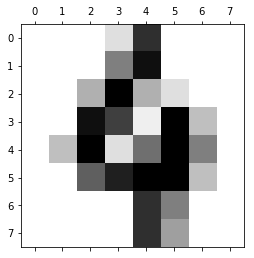

Classifier thinks this is 4


In [7]:
i = 100

plt.matshow(digits.images[i], cmap=plt.cm.gray_r) 
plt.show() 

result = classifier.predict(x[i].reshape(1, -1))[0]
print('Classifier thinks this is ' + str(result))